# The Spark Foundation
 
## Data Science and Business Analytics Intern

## Task 1 - Prediction Using Supervised Machine Learning 

### To predict the percentage of a student based on the no. of study hours
### By- Kaushik kishor kajale

### Loding the neccessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loding the data

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape

(25, 2)

 There are 25 rows and 2 columns are present in the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

### Descriptive Statistics

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### So there is no null value present in the dataset

### Correlation Check

In [8]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

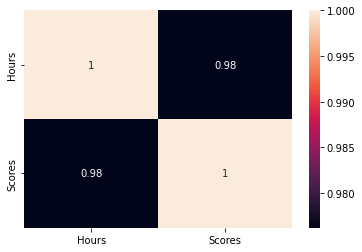

In [28]:
sns.heatmap(data.corr(),annot=True)


## data visualization

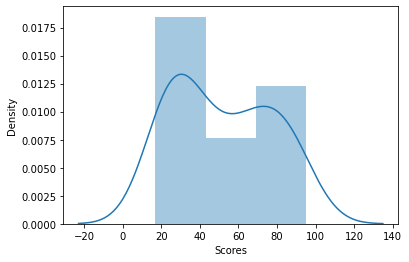

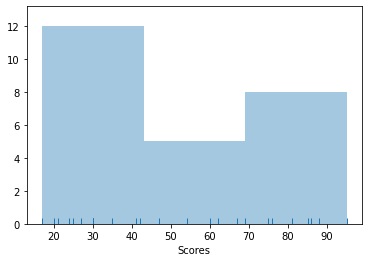

In [9]:
sns.distplot(data["Scores"])
plt.show()
sns.distplot(data["Scores"],kde=False,rug=True)
plt.show()


#### Joint Plot

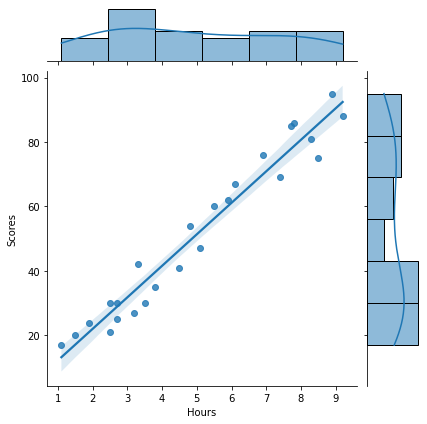

In [10]:
import scipy.stats as stats
sns.jointplot(data['Hours'],data['Scores'],kind="reg")
plt.show()

#### Regression Plot

Text(0.5, 1.0, 'Plotting the regression line')

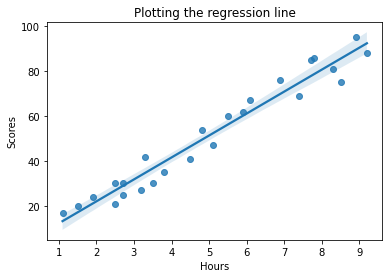

In [11]:
sns.regplot(x="Hours",y="Scores",data=data)
plt.title("Plotting the regression line")

### Conclusion : From the above analysis, we came to know that scores and hours are strongly correlated

## Using simple linear regression to predict the data as we only have two columns

### Seperate the dependent and Independent variable 

In [12]:
X=pd.DataFrame(data['Hours'])
y=pd.DataFrame(data['Scores'])

### Split the data into train test split

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

### Fit the Linear regression Model on X_train  and y_train

In [15]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

### Prediction

In [16]:
y_pred=lr.predict(X_test)
y_pred

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

### Intercept and slope check

In [18]:
lr.intercept_,lr.coef_

(array([2.37081538]), array([[9.78856669]]))

- Intercept(b0) = 2.3708538
- slope(b1) = 9.78856669

## Equation of linear model

Scores = 2.37081538 + 9.78856669 * Hours

### What will be predicted score if a student studies for 9.25 hrs/ day?

In [20]:
Scores = 2.37081538+9.78856669*9.25
Scores

92.9150572625

In [31]:
Score_pred = lr.predict([[9.25]])
print("The predicted score if a student studies for 9.25 hrs/ day is",Score_pred[0] )

The predicted score if a student studies for 9.25 hrs/ day is [92.91505723]


### Evaluation of model

In [27]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.9550952593614691

The model is having accuracy of 95.50%

## Thank you